# IMPORT LIBRARIES

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df=pd.read_csv('../MachineLearning/datasets/Salary_Data.csv')

# DATA ANALYSIS & VISUALIZATION

In [80]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [82]:
df.shape

(6704, 6)

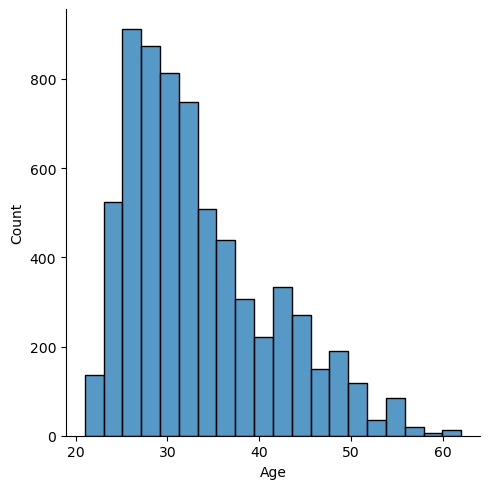

In [83]:
sns.displot(x='Age',data=df,bins=20)
plt.show()

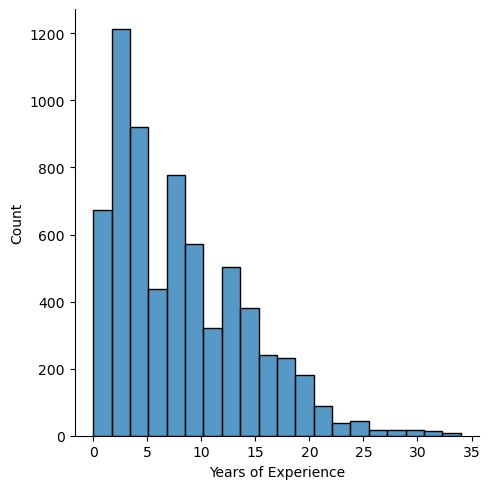

In [84]:
sns.displot(x='Years of Experience',data=df, bins=20)
plt.show()

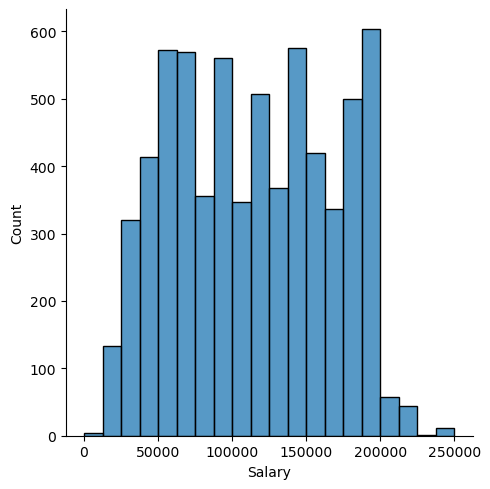

In [85]:
sns.displot(x='Salary',data=df,bins=20)
plt.show()

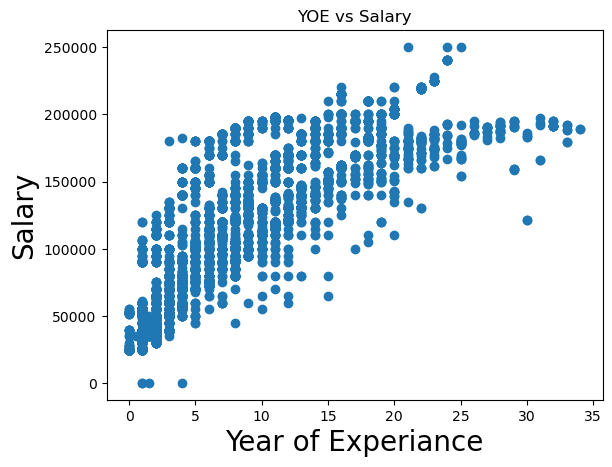

In [86]:
# Relationship between year and salary

plt.scatter(x='Years of Experience',y='Salary',data=df)
plt.xlabel('Year of Experiance',fontsize=20)
plt.ylabel('Salary',fontsize=20)
plt.title('YOE vs Salary')
plt.show()

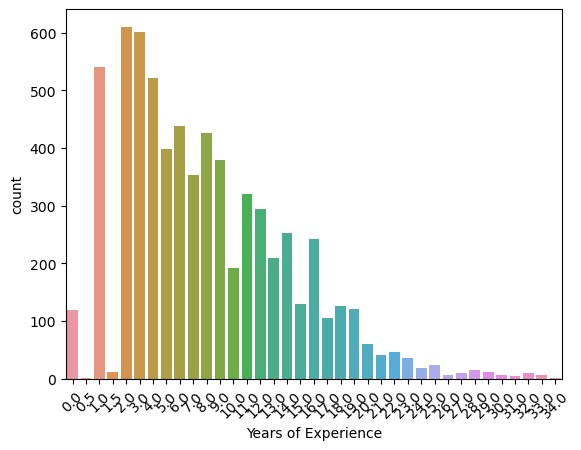

In [87]:
sns.countplot(x='Years of Experience',data=df)
plt.xticks(rotation=45)
plt.show()

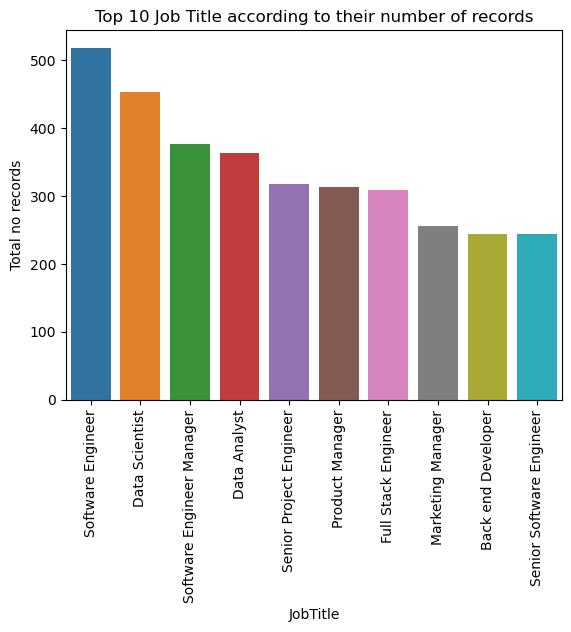

In [88]:
# Top 10 Job Title according to their number of records
sns.barplot(x=df['Job Title'].value_counts()[:10].index,
            y=df['Job Title'].value_counts()[:10].values)
plt.xticks(rotation=90)
plt.xlabel('JobTitle')
plt.ylabel('Total no records')
plt.title('Top 10 Job Title according to their number of records')
plt.show()

<AxesSubplot:>

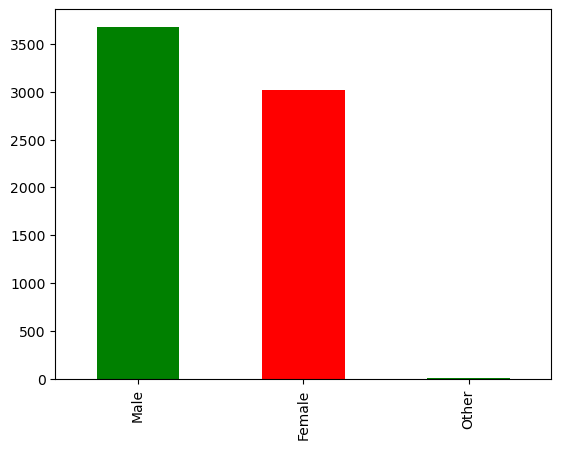

In [6]:
color_list=['red' if i =='Female' else 'Green' for i in df['Gender']]
df.Gender.value_counts().plot(kind='bar',color=color_list)

<AxesSubplot:>

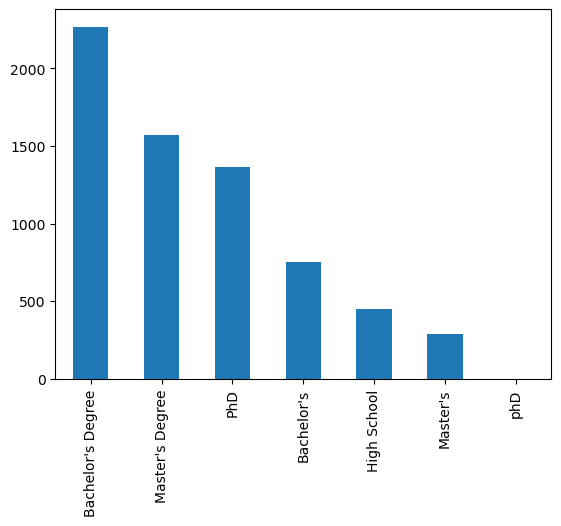

In [7]:
df['Education Level'].value_counts().plot(kind='bar')

In [8]:
df['Job Title'].value_counts().head(40)

Software Engineer                   518
Data Scientist                      453
Software Engineer Manager           376
Data Analyst                        363
Senior Project Engineer             318
Product Manager                     313
Full Stack Engineer                 309
Marketing Manager                   255
Back end Developer                  244
Senior Software Engineer            244
Front end Developer                 241
Marketing Coordinator               158
Junior Sales Associate              142
Financial Manager                   134
Marketing Analyst                   132
Software Developer                  125
Operations Manager                  114
Human Resources Manager             104
Director of Marketing                88
Web Developer                        87
Research Director                    75
Product Designer                     75
Content Marketing Manager            73
Sales Associate                      70
Senior Product Marketing Manager     69


Text(0, 0.5, 'Age')

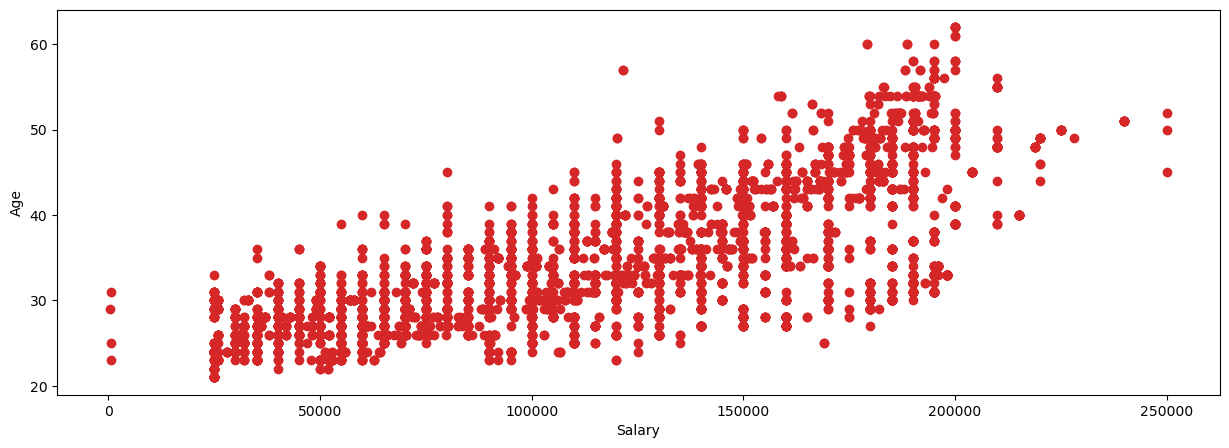

In [9]:
f,ax=plt.subplots(figsize=(15,5))
ax.scatter(x='Salary',y='Age',data=df,color='C3')
ax.set_xlabel('Salary')
ax.set_ylabel('Age')

In [10]:
df.corr()

,Age,Years of Experience,Salary
Age,1.000000,0.937655,0.728053
Years of Experience,0.937655,1.000000,0.808969
Salary,0.728053,0.808969,1.000000


Text(0, 0.5, 'Experience')

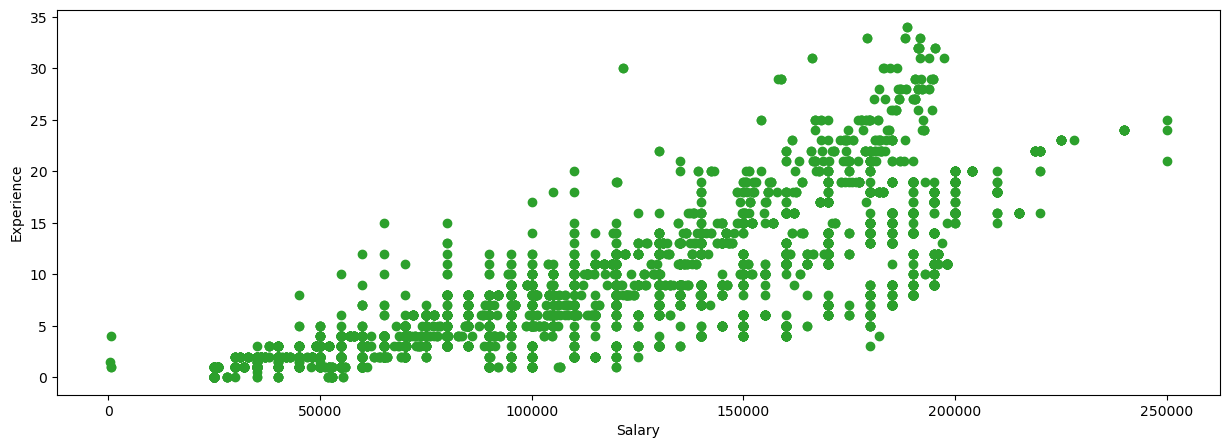

In [11]:
f,ax=plt.subplots(figsize=(15,5))
ax.scatter(x='Salary',y='Years of Experience',data=df,color='C2')
ax.set_xlabel('Salary')
ax.set_ylabel('Experience')

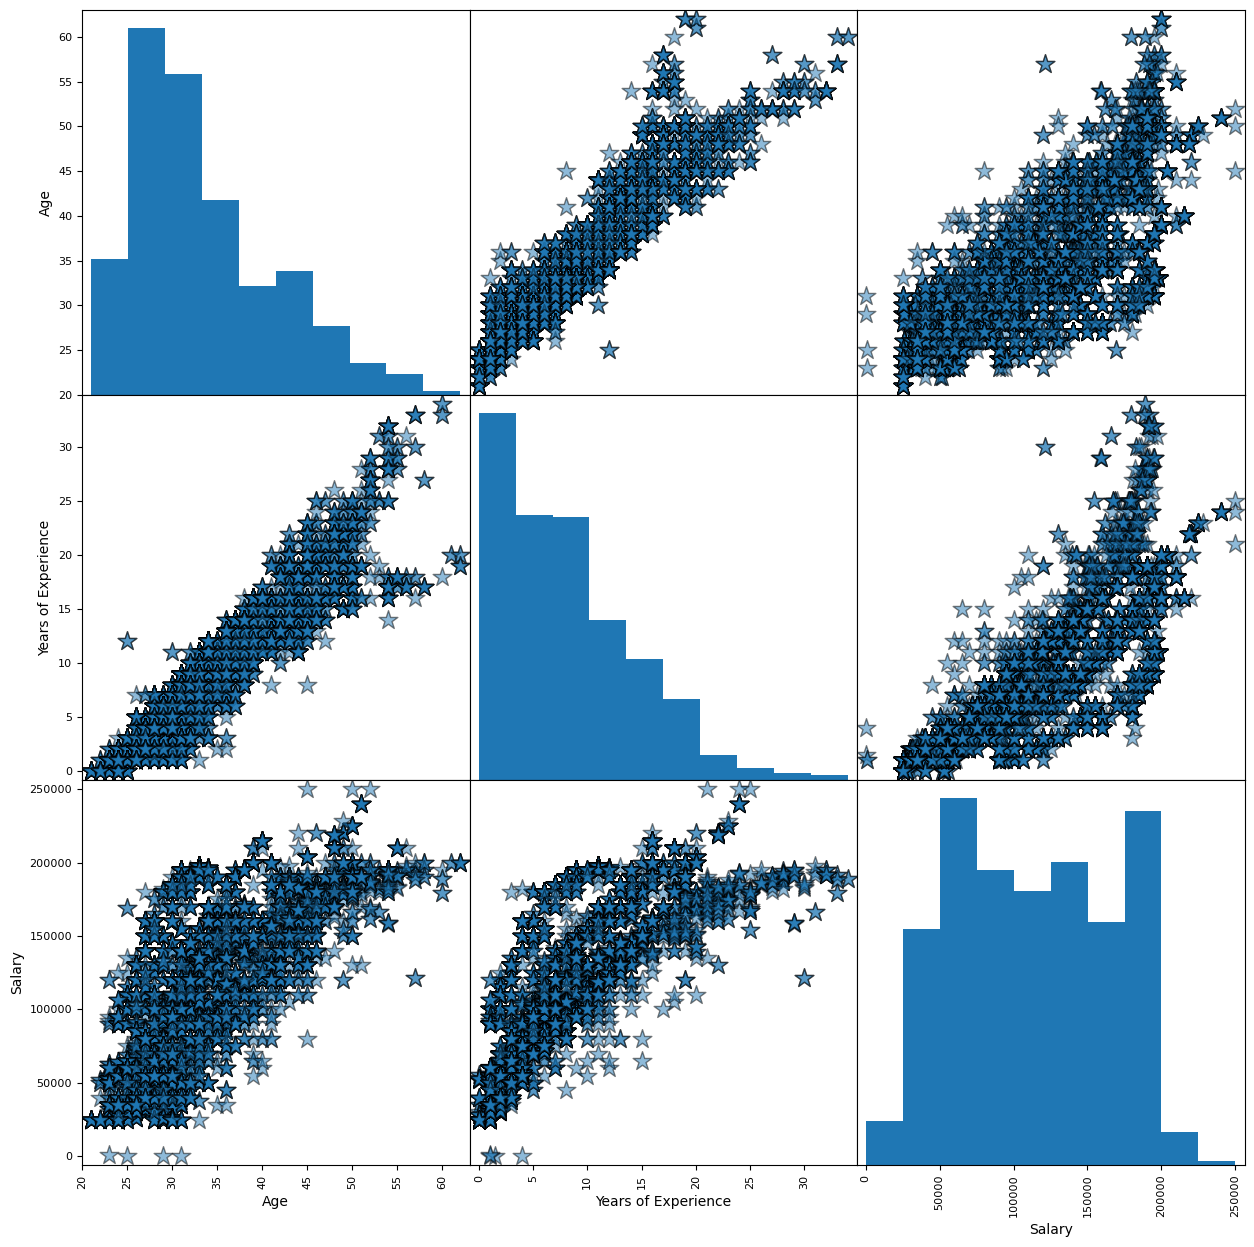

In [12]:
pd.plotting.scatter_matrix(df, figsize= [15,15],
                               diagonal='hist',
                               alpha=0.5,
                               s = 200,
                               marker = '*',
                               edgecolor= "black")
plt.show()

[Text(0, 0, "Bachelor's"),
 Text(1, 0, "Master's"),
 Text(2, 0, 'PhD'),
 Text(3, 0, "Bachelor's Degree"),
 Text(4, 0, "Master's Degree"),
 Text(5, 0, 'High School'),
 Text(6, 0, 'phD')]

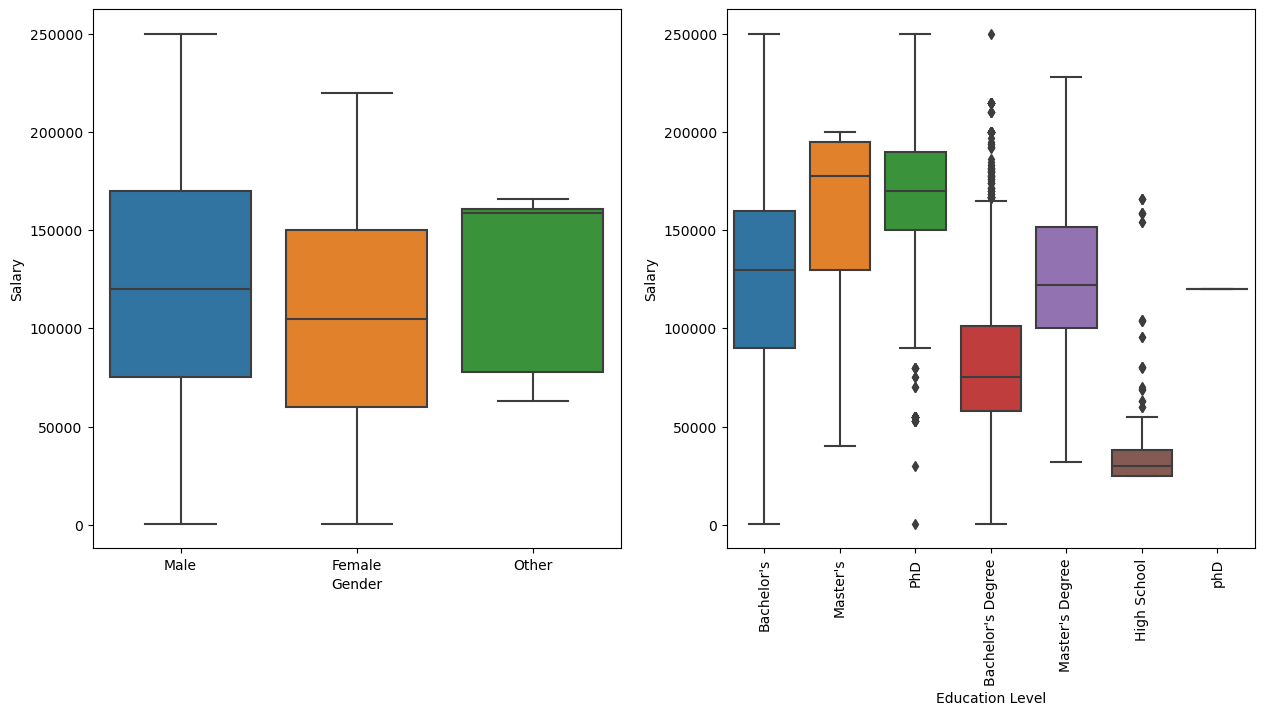

In [13]:
f,ax=plt.subplots(figsize=(15,7),nrows=1,ncols=2)
sns.boxplot(data=df,x='Gender',y='Salary',ax=ax[0])
sns.boxplot(data=df,x='Education Level',y='Salary',ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=90)

# DATA PREPERATION

In [14]:
df[df['Education Level']=='phD']

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
5878,27.0,Male,phD,Marketing Coordinator,7.0,120000.0


In [15]:
df.loc[5878,'Education Level']='PhD'

In [16]:
df['Education Level'].value_counts()

Bachelor's Degree    2267
Master's Degree      1573
PhD                  1369
Bachelor's            756
High School           448
Master's              288
Name: Education Level, dtype: int64

In [17]:
Bachelor_index=df[df['Education Level']=="Bachelor's"].index
Bachelor_index

Int64Index([   0,    3,    5,    7,    8,   11,   12,   14,   15,   18,
            ...
            1187, 1188, 1189, 1192, 1193, 1195, 1196, 1198, 1199, 1200],
           dtype='int64', length=756)

In [18]:
df.loc[Bachelor_index,'Education Level']="Bachelor's Degree"

In [19]:
df['Education Level'].value_counts()

Bachelor's Degree    3023
Master's Degree      1573
PhD                  1369
High School           448
Master's              288
Name: Education Level, dtype: int64

In [20]:
Master_index=df[df['Education Level']=="Master's"].index
df.loc[Master_index,'Education Level']="Master's Degree"

In [21]:
df['Education Level'].value_counts()

Bachelor's Degree    3023
Master's Degree      1861
PhD                  1369
High School           448
Name: Education Level, dtype: int64

[Text(0, 0, "Bachelor's Degree"),
 Text(1, 0, "Master's Degree"),
 Text(2, 0, 'PhD'),
 Text(3, 0, 'High School')]

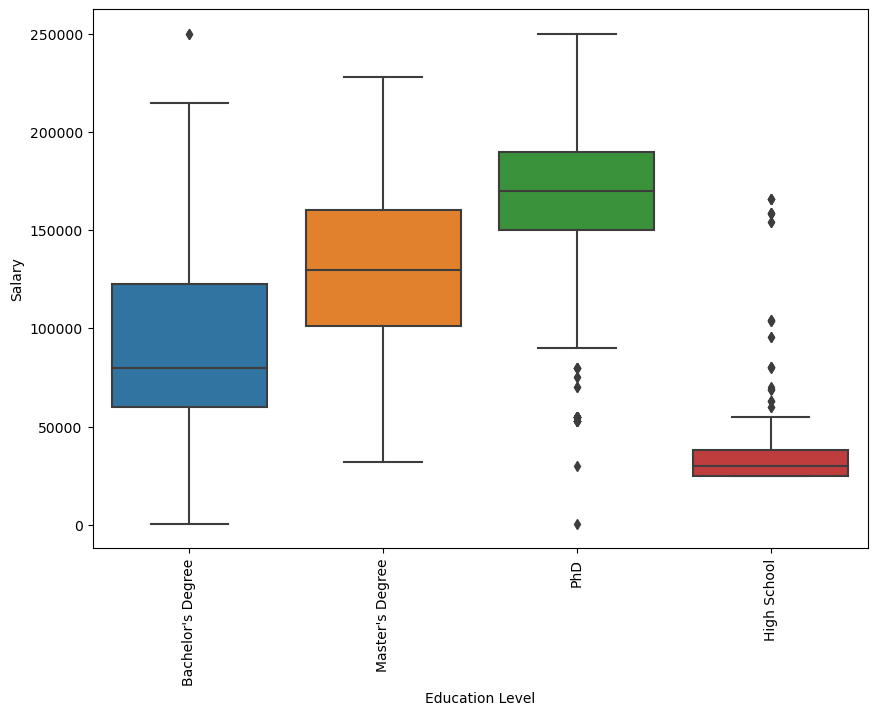

In [22]:
f,ax=plt.subplots(figsize=(10,7))
sns.boxplot(data=df,x='Education Level',y='Salary')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [24]:
job_title_counts=df['Job Title'].value_counts()
job_titles_over_100=job_title_counts[job_title_counts>100]
print(job_titles_over_100)


Software Engineer            518
Data Scientist               453
Software Engineer Manager    376
Data Analyst                 363
Senior Project Engineer      318
Product Manager              313
Full Stack Engineer          309
Marketing Manager            255
Back end Developer           244
Senior Software Engineer     244
Front end Developer          241
Marketing Coordinator        158
Junior Sales Associate       142
Financial Manager            134
Marketing Analyst            132
Software Developer           125
Operations Manager           114
Human Resources Manager      104
Name: Job Title, dtype: int64


In [25]:
selected_profession=job_titles_over_100.index.to_list()
print(selected_profession)

['Software Engineer', 'Data Scientist', 'Software Engineer Manager', 'Data Analyst', 'Senior Project Engineer', 'Product Manager', 'Full Stack Engineer', 'Marketing Manager', 'Back end Developer', 'Senior Software Engineer', 'Front end Developer', 'Marketing Coordinator', 'Junior Sales Associate', 'Financial Manager', 'Marketing Analyst', 'Software Developer', 'Operations Manager', 'Human Resources Manager']


In [26]:
len(df)

6704

In [27]:
for index,row in df.iterrows():
    if row['Job Title'] not in selected_profession:
        df.loc[index,'Job Title']='Other'

In [28]:
df['Job Title'].value_counts()

Other                        2161
Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
Product Manager               313
Full Stack Engineer           309
Marketing Manager             255
Senior Software Engineer      244
Back end Developer            244
Front end Developer           241
Marketing Coordinator         158
Junior Sales Associate        142
Financial Manager             134
Marketing Analyst             132
Software Developer            125
Operations Manager            114
Human Resources Manager       104
Name: Job Title, dtype: int64

In [29]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Other,15.0,150000.0
3,36.0,Female,Bachelor's Degree,Other,7.0,60000.0
4,52.0,Male,Master's Degree,Other,20.0,200000.0


In [32]:
df.isnull().sum()


Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [33]:
df=df.dropna()

In [34]:
df=pd.get_dummies(data=df,drop_first=True)
df.head()

,Age,Years of Experience,Salary,Gender_Male,Gender_Other,Education Level_High School,Education Level_Master's Degree,Education Level_PhD,Job Title_Data Analyst,Job Title_Data Scientist,...,Job Title_Marketing Coordinator,Job Title_Marketing Manager,Job Title_Operations Manager,Job Title_Other,Job Title_Product Manager,Job Title_Senior Project Engineer,Job Title_Senior Software Engineer,Job Title_Software Developer,Job Title_Software Engineer,Job Title_Software Engineer Manager
0,32.0,5.0,90000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,28.0,3.0,65000.0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,45.0,15.0,150000.0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,36.0,7.0,60000.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,52.0,20.0,200000.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 0 to 6703
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  6698 non-null   float64
 1   Years of Experience                  6698 non-null   float64
 2   Salary                               6698 non-null   float64
 3   Gender_Male                          6698 non-null   uint8  
 4   Gender_Other                         6698 non-null   uint8  
 5   Education Level_High School          6698 non-null   uint8  
 6   Education Level_Master's Degree      6698 non-null   uint8  
 7   Education Level_PhD                  6698 non-null   uint8  
 8   Job Title_Data Analyst               6698 non-null   uint8  
 9   Job Title_Data Scientist             6698 non-null   uint8  
 10  Job Title_Financial Manager          6698 non-null   uint8  
 11  Job Title_Front end Developer 

# MODELS

In [36]:
from sklearn.model_selection import train_test_split,cross_val_score

X=df.drop('Salary',axis=1)
Y=df['Salary']

In [37]:

X

,Age,Years of Experience,Gender_Male,Gender_Other,Education Level_High School,Education Level_Master's Degree,Education Level_PhD,Job Title_Data Analyst,Job Title_Data Scientist,Job Title_Financial Manager,...,Job Title_Marketing Coordinator,Job Title_Marketing Manager,Job Title_Operations Manager,Job Title_Other,Job Title_Product Manager,Job Title_Senior Project Engineer,Job Title_Senior Software Engineer,Job Title_Software Developer,Job Title_Software Engineer,Job Title_Software Engineer Manager
0,32.0,5.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,28.0,3.0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45.0,15.0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,36.0,7.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,52.0,20.0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,49.0,20.0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6700,32.0,3.0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6701,30.0,4.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6702,46.0,14.0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [38]:
Y

0        90000.0
1        65000.0
2       150000.0
3        60000.0
4       200000.0
          ...   
6699    200000.0
6700     50000.0
6701     55000.0
6702    140000.0
6703     35000.0
Name: Salary, Length: 6698, dtype: float64

In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [48]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

def evaluation(y,prediction):
    mae=mean_absolute_error(y,prediction)
    mse=mean_squared_error(y,prediction)
    r_squared=r2_score(y,prediction)
    return mse,mae,r_squared

def rmse_cv(model):
    rmse=np.sqrt(-cross_val_score(model,X,Y,scoring='neg_mean_squared_error',cv=5)).mean()
    return rmse

In [49]:
models=pd.DataFrame(columns=['Model','MAE','MSE','R2 SCORE','RMSE(Cross-Validation)'])
models

,Model,MAE,MSE,R2 SCORE,RMSE(Cross-Validation)


# LINEAR REGRESSION

In [50]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
y_pred=lin_reg.predict(X_test)

mse,mae,r_squared=evaluation(Y_test,y_pred)

print('MAE',mae),
print("MSE",mse)
print('R2 Score', r_squared)

rmse=rmse_cv(lin_reg)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse}
models = models.append(new_row, ignore_index=True)

MAE 18192.926898281876
MSE 573103038.6912555
R2 Score 0.7990141226877229


C:\Users\svygralingam\AppData\Local\Temp\6\ipykernel_2756\126786687.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


# RIDGE REGRESSION

In [54]:
from sklearn.linear_model import Ridge

ridge=Ridge()
ridge.fit(X_train,Y_train)
y_pred=ridge.predict(X_test)


mse,mae,r_squared=evaluation(Y_test,y_pred)

print('MAE',mae),
print("MSE",mse)
print('R2 Score', r_squared)

rmse=rmse_cv(ridge)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, 
           "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse}
models = models.append(new_row, ignore_index=True)

MAE 18192.329072611246
MSE 573149490.6621735
R2 Score 0.7989978320916213


C:\Users\svygralingam\AppData\Local\Temp\6\ipykernel_2756\754763322.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


# LASSO REGRESSION

In [55]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, Y_train)
prediction = lasso.predict(X_test)

mse,mae,r_squared=evaluation(Y_test,y_pred)

print('MAE',mae),
print("MSE",mse)
print('R2 Score', r_squared)

rmse=rmse_cv(lasso)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, 
           "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse}
models = models.append(new_row, ignore_index=True)

MAE 18192.329072611246
MSE 573149490.6621735
R2 Score 0.7989978320916213


C:\Users\svygralingam\AppData\Local\Temp\6\ipykernel_2756\198508601.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


In [53]:
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# ELASTICNET REGRESSION

In [56]:
El=ElasticNet()
El.fit(X_train,Y_train)
y_pred=El.predict(X_test)

mae,mse,r_squared = evaluation(Y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r_squared)

rmse = rmse_cv(El)

new_row = {"Model": "Elastic Net","MAE": mae, "MSE": mse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 836062833.3141
MSE: 23174.74291056263
R2 Score: 0.7067947459752555


C:\Users\svygralingam\AppData\Local\Temp\6\ipykernel_2756\3498561579.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


# SUPPORT VECTOR MACHINE

In [68]:

svr = SVR(C=100000)
svr.fit(X_train, Y_train)
predictions = svr.predict(X_test)

mae, mse, r_squared = evaluation(Y_test, predictions)

print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r_squared)

rmse_cross_val = rmse_cv(svr)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 408846203.32130045
MSE: 14408.998872929726
R2 Score: 0.856618605533876


C:\Users\svygralingam\AppData\Local\Temp\6\ipykernel_2756\1042660773.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


# RANDOM FOREST REGRESSION

In [60]:
random_forest=RandomForestRegressor(n_estimators=1200,
                                    max_depth=15,
                                    min_samples_split=5,
                                    min_samples_leaf=5,
                                    max_features=None,
                                    oob_score=True,
                                    random_state=42)
random_forest.fit(X_train,Y_train)
y_pred=random_forest.predict(X_test)

mae,mse,r_squared = evaluation(Y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r_squared)

rmse = rmse_cv(random_forest)

new_row = {"Model": "Elastic Net","MAE": mae, "MSE": mse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 101120265.76794979
MSE: 5455.2769252954795
R2 Score: 0.9645373624683031


C:\Users\svygralingam\AppData\Local\Temp\6\ipykernel_2756\2157789418.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


# XG BOOST REGRESSION

In [66]:

xgb = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

xgb.fit(X_train, Y_train)
predictions = xgb.predict(X_test)

mae, mse, r_squared = evaluation(Y_test, predictions)

print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r_squared)

rmse_cross_val = rmse_cv(xgb)

new_row = {"Model": "XgBoost","MAE": mae, "MSE": mse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

rmse = rmse_cv(xgb)

new_row = {"Model": "Elastic Net","MAE": mae, "MSE": mse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 82200136.99076812
MSE: 5382.767648087686
R2 Score: 0.9711726067863702


C:\Users\svygralingam\AppData\Local\Temp\6\ipykernel_2756\3126444361.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)
C:\Users\svygralingam\AppData\Local\Temp\6\ipykernel_2756\3126444361.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


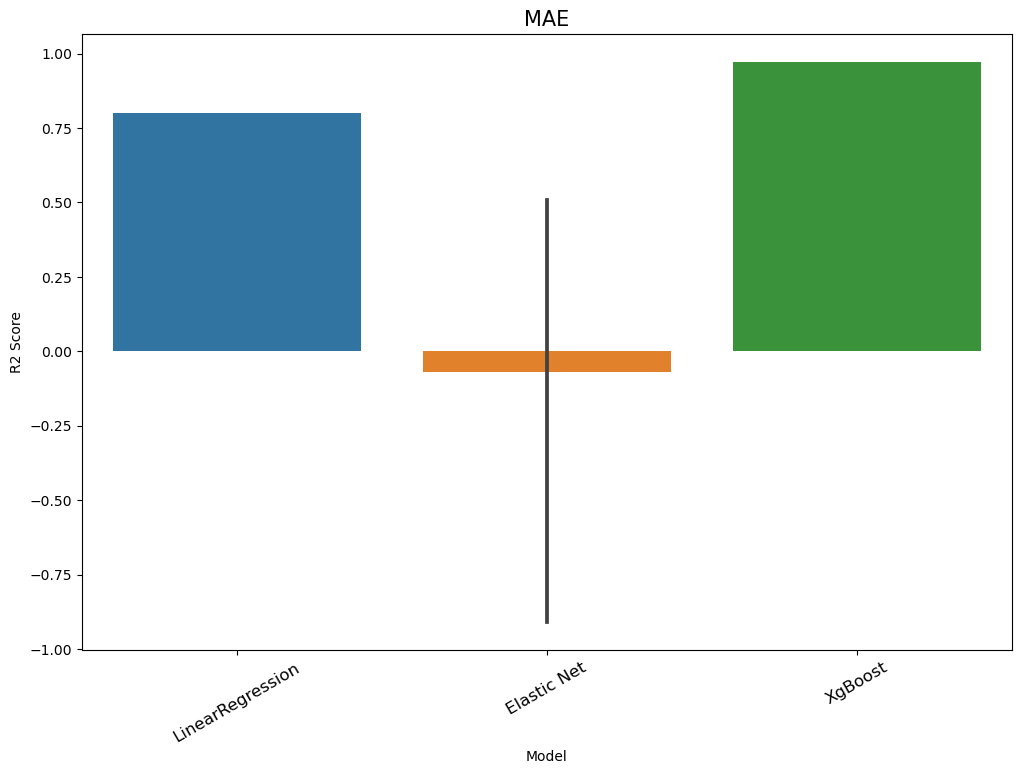

In [67]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["R2 Score"])
plt.title("MAE", size=15)
plt.xticks(rotation=30, size=12)
plt.show()